connect to the Frankfurter API provided be the European Central Bank on current and historical_ foreign exchanges rates. 



Requirements.

1.Visit the API documentation of the Frankfurter app and carefully read the API documentation provided.

2. Install the necessary package(requests) to connect to the API using the appropriate Http Verb.

3. Get the data on currency exchanges rates for the last 10 years. (2013 - 2023)

4. Analyze the data and answer the following question

Please perform a simple summary statistic and present any interesting conclusion you can draw
Note that these questions are mainly visualization with minimal computations.
Use in built methods like sum(), std(), etc.

Questions

1.  How has the exchange rate of the Euro (EUR) against the US Dollar (USD) changed over time?
    Visualization: A line chart showing the exchange rate for EUR to USD
2.  What is the distribution of exchange rates for the Chinese Yuan (CNY) against the Euro (EUR)?
    Visualization: Histogram or kernel density plot for the distribution of CNY to EUR exchange rates.
3.  Between the Great British Pound (GBP) and the Japanese Yen (JPY) determine which country's currency is more volatile
    Visualization: Bar chart comparing the volatility of the selected currencies. 
4.  Is there a correlation between the exchange rates of the Canadian Dollar (CAD) and the American Dollar (USD)??
    Visualization: Scatter plot with CAD to USD and data points representing the exchange rates.

In [61]:
import requests

url = "https://api.frankfurter.app/2013-01-01..2023-12-31"

response = requests.get(url)
response.text

'{"amount":1.0,"base":"EUR","start_date":"2012-12-31","end_date":"2023-12-25","rates":{"2012-12-31":{"AUD":1.2534,"BGN":1.9558,"BRL":2.6831,"CAD":1.296,"CHF":1.2091,"CNY":8.1813,"CZK":25.278,"DKK":7.4597,"GBP":0.81235,"HKD":10.1738,"HRK":7.5682,"HUF":291.25,"IDR":12724,"ILS":4.9186,"INR":71.702,"JPY":114.76,"KRW":1395.31,"LTL":3.4528,"LVL":0.6977,"MXN":16.7733,"MYR":3.9877,"NOK":7.3027,"NZD":1.5798,"PHP":53.585,"PLN":4.0925,"RON":4.4281,"RUB":39.796,"SEK":8.5471,"SGD":1.6072,"THB":39.909,"TRY":2.3412,"USD":1.3125,"ZAR":11.2497},"2013-01-07":{"AUD":1.2454,"BGN":1.9558,"BRL":2.6658,"CAD":1.293,"CHF":1.2106,"CNY":8.1627,"CZK":25.579,"DKK":7.4605,"GBP":0.81633,"HKD":10.165,"HRK":7.5716,"HUF":292.62,"IDR":12666,"ILS":4.9487,"INR":71.982,"JPY":115.46,"KRW":1390.55,"LTL":3.4528,"LVL":0.69706,"MXN":16.6656,"MYR":3.9802,"NOK":7.3207,"NZD":1.5641,"PHP":53.438,"PLN":4.1083,"RON":4.3994,"RUB":39.793,"SEK":8.5756,"SGD":1.6094,"THB":39.818,"TRY":2.3299,"USD":1.3114,"ZAR":11.3051},"2013-01-14":{"AUD"

In [62]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [63]:
response_dict = response.json()
df = pd.DataFrame(response_dict)
df.head()

,amount,base,start_date,end_date,rates
2012-12-31,1.0,EUR,2012-12-31,2023-12-25,"{'AUD': 1.2534, 'BGN': 1.9558, 'BRL': 2.6831, ..."
2013-01-07,1.0,EUR,2012-12-31,2023-12-25,"{'AUD': 1.2454, 'BGN': 1.9558, 'BRL': 2.6658, ..."
2013-01-14,1.0,EUR,2012-12-31,2023-12-25,"{'AUD': 1.2649, 'BGN': 1.9558, 'BRL': 2.7182, ..."
2013-01-21,1.0,EUR,2012-12-31,2023-12-25,"{'AUD': 1.2713, 'BGN': 1.9558, 'BRL': 2.7238, ..."
2013-01-28,1.0,EUR,2012-12-31,2023-12-25,"{'AUD': 1.2985, 'BGN': 1.9558, 'BRL': 2.7009, ..."


In [64]:
df_rates = pd.json_normalize(df["rates"])
df_rates

,AUD,BGN,BRL,CAD,CHF,CNY,CZK,DKK,GBP,HKD,...,PLN,RON,RUB,SEK,SGD,THB,TRY,USD,ZAR,ISK
0,1.2534,1.9558,2.6831,1.2960,1.20910,8.1813,25.278,7.4597,0.81235,10.1738,...,4.0925,4.4281,39.796,8.5471,1.6072,39.909,2.3412,1.3125,11.2497,NaN
1,1.2454,1.9558,2.6658,1.2930,1.21060,8.1627,25.579,7.4605,0.81633,10.1650,...,4.1083,4.3994,39.793,8.5756,1.6094,39.818,2.3299,1.3114,11.3051,NaN
2,1.2649,1.9558,2.7182,1.3157,1.23720,8.2884,25.597,7.4626,0.83257,10.3323,...,4.1274,4.3564,40.374,8.6386,1.6330,39.884,2.3541,1.3327,11.7232,NaN
3,1.2713,1.9558,2.7238,1.3324,1.24100,8.3096,25.608,7.4629,0.84293,10.3566,...,4.1750,4.3650,40.287,8.6904,1.6409,39.804,2.3626,1.3358,11.9565,NaN
4,1.2985,1.9558,2.7009,1.3572,1.23950,8.4169,25.652,7.4605,0.85702,10.4907,...,4.1961,4.3848,40.662,8.6231,1.6743,40.348,2.3862,1.3522,12.1687,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569,1.6544,1.9558,5.3684,1.4868,0.96010,7.8129,24.322,7.4554,0.86486,8.5349,...,4.3468,4.9718,NaN,11.4044,1.4611,38.312,31.6180,1.0938,20.4270,150.70
570,1.6394,1.9558,5.3070,1.4663,0.94490,7.7247,24.362,7.4558,0.85713,8.4406,...,4.3330,4.9675,NaN,11.2861,1.4463,38.017,31.2560,1.0802,20.3690,150.42
571,1.6376,1.9558,5.3508,1.4648,0.94702,7.7551,24.430,7.4564,0.85883,8.4665,...,4.3234,4.9720,NaN,11.2496,1.4502,38.364,31.4730,1.0843,20.3620,150.66
572,1.6225,1.9558,5.3582,1.4635,0.94518,7.8262,24.535,7.4559,0.86476,8.5592,...,4.3412,4.9702,NaN,11.1207,1.4576,38.229,31.9460,1.0966,20.2090,150.54


In [65]:
#drop the rates column
df.drop("rates", axis=1, inplace=True)

In [66]:
df.reset_index(drop=False, inplace=True)

In [68]:
df_rates.head()

,AUD,BGN,BRL,CAD,CHF,CNY,CZK,DKK,GBP,HKD,...,PLN,RON,RUB,SEK,SGD,THB,TRY,USD,ZAR,ISK
0,1.2534,1.9558,2.6831,1.2960,1.2091,8.1813,25.278,7.4597,0.81235,10.1738,...,4.0925,4.4281,39.796,8.5471,1.6072,39.909,2.3412,1.3125,11.2497,NaN
1,1.2454,1.9558,2.6658,1.2930,1.2106,8.1627,25.579,7.4605,0.81633,10.1650,...,4.1083,4.3994,39.793,8.5756,1.6094,39.818,2.3299,1.3114,11.3051,NaN
2,1.2649,1.9558,2.7182,1.3157,1.2372,8.2884,25.597,7.4626,0.83257,10.3323,...,4.1274,4.3564,40.374,8.6386,1.6330,39.884,2.3541,1.3327,11.7232,NaN
3,1.2713,1.9558,2.7238,1.3324,1.2410,8.3096,25.608,7.4629,0.84293,10.3566,...,4.1750,4.3650,40.287,8.6904,1.6409,39.804,2.3626,1.3358,11.9565,NaN
4,1.2985,1.9558,2.7009,1.3572,1.2395,8.4169,25.652,7.4605,0.85702,10.4907,...,4.1961,4.3848,40.662,8.6231,1.6743,40.348,2.3862,1.3522,12.1687,NaN


In [69]:
#join df table with the new rates (df_rates) table
df = pd.concat([df, df_rates], axis=1)
df.head()

,index,amount,base,start_date,end_date,AUD,BGN,BRL,CAD,CHF,...,PLN,RON,RUB,SEK,SGD,THB,TRY,USD,ZAR,ISK
0,2012-12-31,1.0,EUR,2012-12-31,2023-12-25,1.2534,1.9558,2.6831,1.2960,1.2091,...,4.0925,4.4281,39.796,8.5471,1.6072,39.909,2.3412,1.3125,11.2497,NaN
1,2013-01-07,1.0,EUR,2012-12-31,2023-12-25,1.2454,1.9558,2.6658,1.2930,1.2106,...,4.1083,4.3994,39.793,8.5756,1.6094,39.818,2.3299,1.3114,11.3051,NaN
2,2013-01-14,1.0,EUR,2012-12-31,2023-12-25,1.2649,1.9558,2.7182,1.3157,1.2372,...,4.1274,4.3564,40.374,8.6386,1.6330,39.884,2.3541,1.3327,11.7232,NaN
3,2013-01-21,1.0,EUR,2012-12-31,2023-12-25,1.2713,1.9558,2.7238,1.3324,1.2410,...,4.1750,4.3650,40.287,8.6904,1.6409,39.804,2.3626,1.3358,11.9565,NaN
4,2013-01-28,1.0,EUR,2012-12-31,2023-12-25,1.2985,1.9558,2.7009,1.3572,1.2395,...,4.1961,4.3848,40.662,8.6231,1.6743,40.348,2.3862,1.3522,12.1687,NaN


In [70]:
#drop column duplicates 
data = df.T.drop_duplicates().T

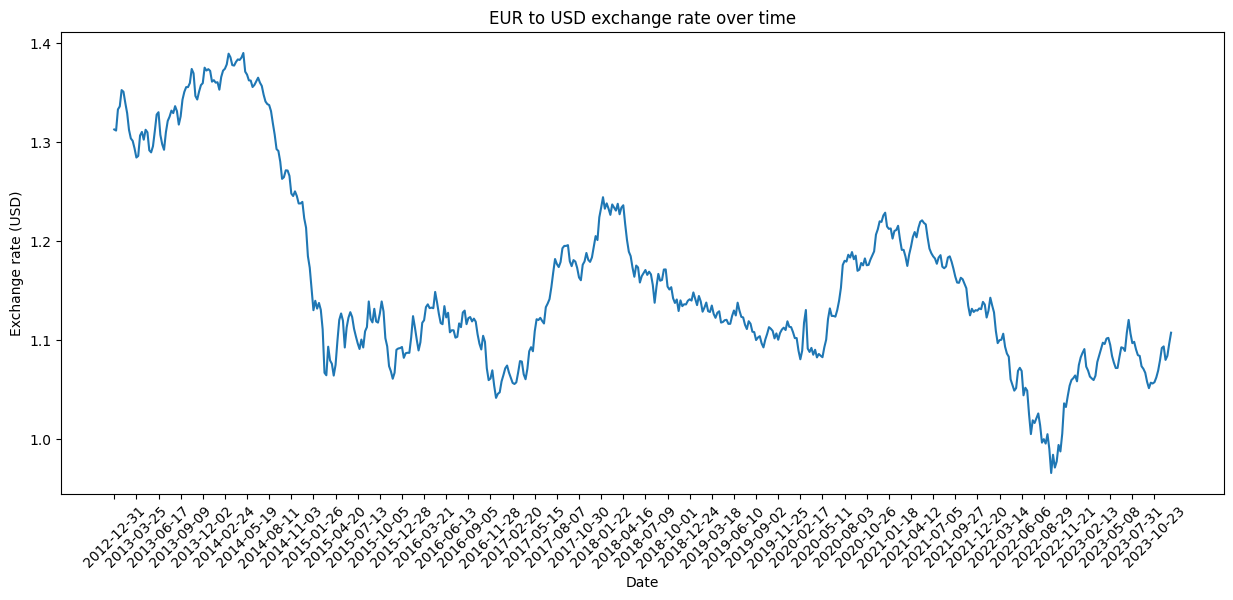

In [71]:
#1.  How has the exchange rate of the Euro (EUR) against the US Dollar (USD) changed over time?

plt.figure(figsize=(15,6))
plt.plot(data["index"],data["USD"])
plt.title("EUR to USD exchange rate over time")
plt.xlabel("Date")
plt.ylabel("Exchange rate (USD)")
plt.xticks(data["index"][::12])
plt.xticks(rotation=45)
plt.show()

Text(0, 0.5, 'Frequency')

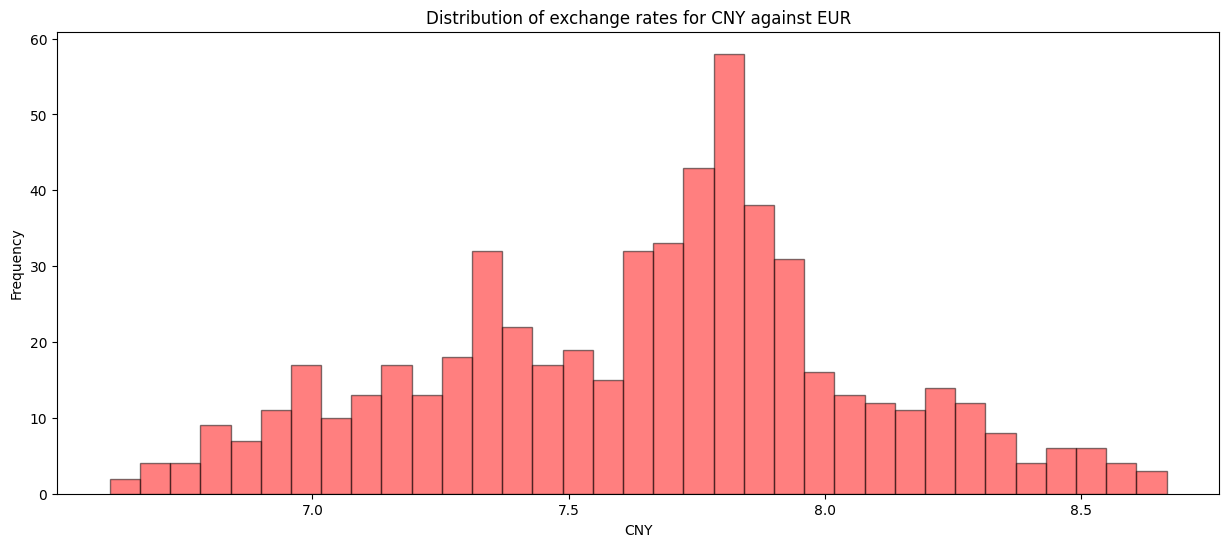

In [72]:
#2.  What is the distribution of exchange rates for the Chinese Yuan (CNY) against the Euro (EUR)?
plt.figure(figsize=(15,6))
plt.hist(data["CNY"],bins=35, alpha=0.5, color= "red", edgecolor= "black")
plt.title("Distribution of exchange rates for CNY against EUR")
plt.xlabel("CNY")
plt.ylabel("Frequency")

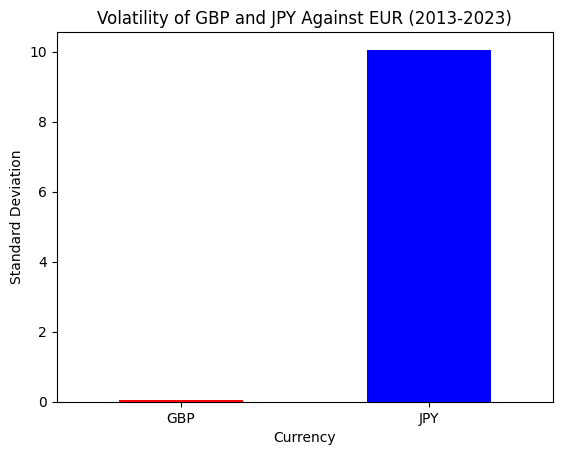

In [78]:
# 3.Between the Great British Pound (GBP) and the Japanese Yen (JPY) determine which country's currency is more volatile
volatility_df = data[['GBP', 'JPY']].std()  # Standard deviation
volatility_df.plot(kind='bar', color=['red', 'blue'])
plt.title('Volatility of GBP and JPY Against EUR (2013-2023)')
plt.ylabel('Standard Deviation')
plt.xlabel('Currency')
plt.xticks(rotation=0)
plt.show()

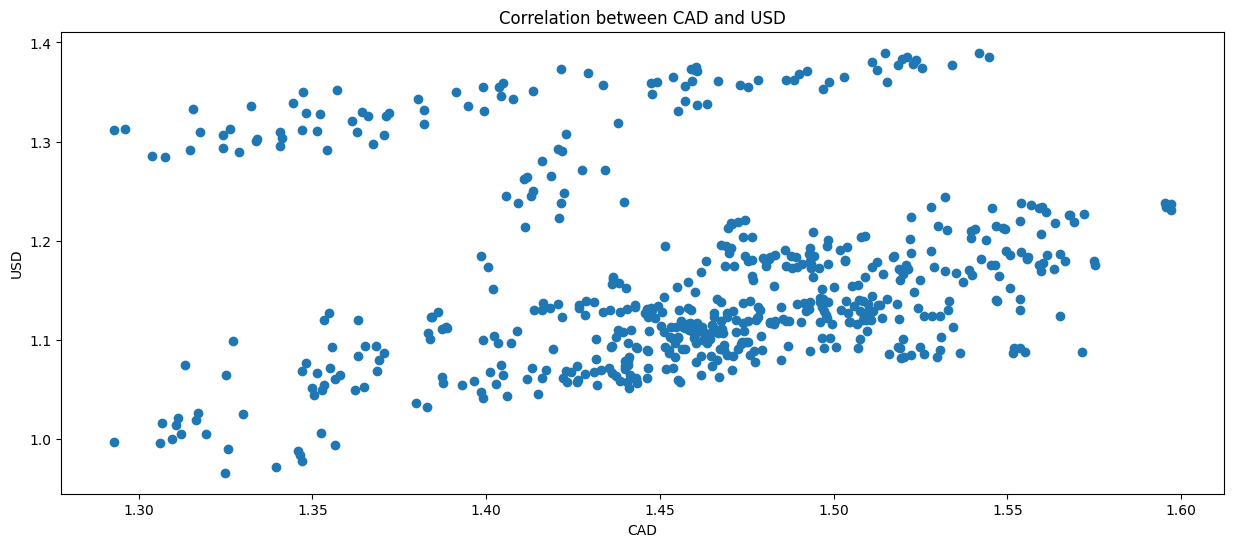

In [76]:
#4. Is there a correlation between the exchange rates of the Canadian Dollar (CAD) and the American Dollar (USD)??

plt.figure(figsize=(15,6))
plt.scatter(data["CAD"],data["USD"])
plt.title("Correlation between CAD and USD")
plt.xlabel("CAD")
plt.ylabel("USD")
plt.show()